## Process


### Extraccion de datos


Los cruces fueron extraidos de la pagina oficial:

https://isasurf.org/event/paris-2024/#

In [3]:
import numpy as np
import pandas as pd

dataframe = {'Heat':['HEAT1','HEAT1','HEAT1','HEAT2','HEAT2','HEAT2','HEAT3','HEAT3','HEAT3','HEAT4','HEAT4','HEAT4','HEAT5','HEAT5','HEAT5','HEAT6','HEAT6','HEAT6','HEAT7','HEAT7','HEAT7','HEAT8','HEAT8','HEAT8'],
             'Name':['Ethan Ewing','Tim Elter','Jordy Smith','Joan Duru' ,'Jack Robinson','Matthew McGillivray','Alonso Correa','Filipe Toledo',
                     'Kanoa lgarashi','Gabriel Medina','Connor OLeary','Bryan Perez','Ramzi Boukhiam','Billy Stairmand','João Chianca',
                     'Andy Criere','John John Florence','Alan Cleland','Kauli Vaast','Lucca Mesinas','Griffin Colapinto','Rio Waida','Leonardo Fioravanti',
                     'Reo Inaba']
             }

heats = pd.DataFrame(dataframe)
print(heats)

     Heat                 Name
0   HEAT1          Ethan Ewing
1   HEAT1            Tim Elter
2   HEAT1          Jordy Smith
3   HEAT2            Joan Duru
4   HEAT2        Jack Robinson
5   HEAT2  Matthew McGillivray
6   HEAT3        Alonso Correa
7   HEAT3        Filipe Toledo
8   HEAT3       Kanoa lgarashi
9   HEAT4       Gabriel Medina
10  HEAT4        Connor OLeary
11  HEAT4          Bryan Perez
12  HEAT5       Ramzi Boukhiam
13  HEAT5      Billy Stairmand
14  HEAT5         João Chianca
15  HEAT6          Andy Criere
16  HEAT6   John John Florence
17  HEAT6         Alan Cleland
18  HEAT7          Kauli Vaast
19  HEAT7        Lucca Mesinas
20  HEAT7    Griffin Colapinto
21  HEAT8            Rio Waida
22  HEAT8  Leonardo Fioravanti
23  HEAT8            Reo Inaba


In [3]:
nums = [4133,13157,564,621,3442,3737,1551,1456,3896,1085,2838,10252,1349,2038,9167,2649,199,9341,8990,4391,3165,9112,2656,1490]
heats['url'] = nums
print(heats)

     Heat                 Name    url
0   HEAT1          Ethan Ewing   4133
1   HEAT1            Tim Elter  13157
2   HEAT1          Jordy Smith    564
3   HEAT2            Joan Duru    621
4   HEAT2        Jack Robinson   3442
5   HEAT2  Matthew McGillivray   3737
6   HEAT3        Alonso Correa   1551
7   HEAT3        Filipe Toledo   1456
8   HEAT3       Kanoa lgarashi   3896
9   HEAT4       Gabriel Medina   1085
10  HEAT4        Connor OLeary   2838
11  HEAT4          Bryan Perez  10252
12  HEAT5       Ramzi Boukhiam   1349
13  HEAT5      Billy Stairmand   2038
14  HEAT5         João Chianca   9167
15  HEAT6          Andy Criere   2649
16  HEAT6   John John Florence    199
17  HEAT6         Alan Cleland   9341
18  HEAT7          Kauli Vaast   8990
19  HEAT7        Lucca Mesinas   4391
20  HEAT7    Griffin Colapinto   3165
21  HEAT8            Rio Waida   9112
22  HEAT8  Leonardo Fioravanti   2656
23  HEAT8            Reo Inaba   1490


In [4]:
urls = []

for name in heats.iterrows():
  nombre = name[1].iloc[1]
  if nombre == 'João Chianca':
    nombre = 'Joao Chianca'
  norm_name= nombre.replace(' ', '-').lower()
  url = f'https://www.worldsurfleague.com/athletes/{name[1].iloc[2]}/{norm_name}?isearch=true&scategory=all'
  urls.append(url)
print(urls)


['https://www.worldsurfleague.com/athletes/4133/ethan-ewing?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/13157/tim-elter?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/564/jordy-smith?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/621/joan-duru?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/3442/jack-robinson?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/3737/matthew-mcgillivray?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/1551/alonso-correa?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/1456/filipe-toledo?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/3896/kanoa-lgarashi?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/1085/gabriel-medina?isearch=true&scategory=all', 'https://www.worldsurfleague.com/athletes/2838/connor-oleary?isearch=true&scategory=all', 'https://www.w

#### Obteniendo las estadisticas de cada atleta

In [5]:
import requests
from bs4 import BeautifulSoup

def get_stats (url, name, heat, filas):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  table = soup.find_all('div', class_='new-athlete-stats__body')

  headers = table[1].find_all('th')

  columns =['Heat','Name']
  columns.append(headers[0].find('span').get_text(strip=True))

  columns.append('Average Points per Events')

  rows = table[1].find_all('tr')

  count=0;

  for row in rows:
    if not count:
      count=1
      continue
    celd = [heat, name]
    celdas = row.find_all('td')

    if(celdas[2].get_text(strip=True) == '-'):
      continue

    celd.append(celdas[0].get_text(strip=True))



    points = float(celdas[2].get_text(strip=True).replace(',',''))

    events = float(celdas[3].get_text(strip=True).replace(',',''))

    prom = points/events
    celd.append(prom)

    filas.append(celd)




  return filas, columns


In [7]:
filas = []
columns = []

for i,url in enumerate(urls):

  temp = get_stats(url, heats['Name'][i], heats['Heat'][i], filas)
  columns = temp[1]
  filas = temp[0]



df2 = pd.DataFrame(filas, columns=columns)


print(df2)

      Heat         Name  Year  Average Points per Events
0    HEAT1  Ethan Ewing  2024                3418.571429
1    HEAT1  Ethan Ewing  2023                4370.909091
2    HEAT1  Ethan Ewing  2022                4026.363636
3    HEAT1  Ethan Ewing  2021                2210.000000
4    HEAT1  Ethan Ewing  2017                 977.272727
..     ...          ...   ...                        ...
193  HEAT8    Reo Inaba  2016                 261.428571
194  HEAT8    Reo Inaba  2015                 139.333333
195  HEAT8    Reo Inaba  2014                 125.800000
196  HEAT8    Reo Inaba  2013                 141.400000
197  HEAT8    Reo Inaba  2012                 115.750000

[198 rows x 4 columns]


In [291]:
df2.to_csv('heats.csv', index=False)

In [6]:
df2 = pd.read_csv('heats.csv', encoding='ISO-8859-1')
print(df2)

      Heat         Name  Year  Average Points per Events
0    HEAT1  Ethan Ewing  2024                3988.333333
1    HEAT1  Ethan Ewing  2023                4370.909091
2    HEAT1  Ethan Ewing  2022                4026.363636
3    HEAT1  Ethan Ewing  2021                2210.000000
4    HEAT1  Ethan Ewing  2017                 977.272727
..     ...          ...   ...                        ...
193  HEAT8    Reo Inaba  2016                 261.428571
194  HEAT8    Reo Inaba  2015                 139.333333
195  HEAT8    Reo Inaba  2014                 125.800000
196  HEAT8    Reo Inaba  2013                 141.400000
197  HEAT8    Reo Inaba  2012                 115.750000

[198 rows x 4 columns]


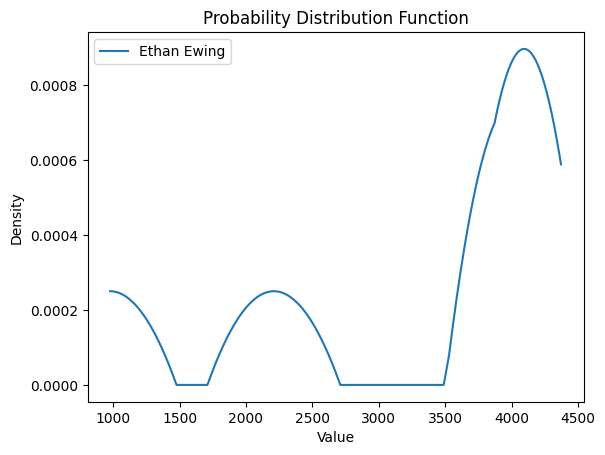

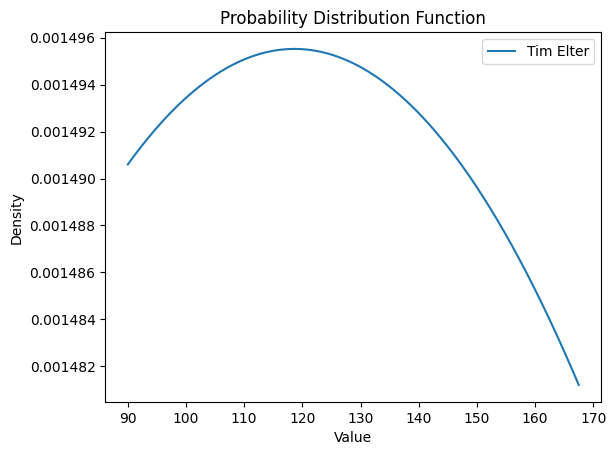

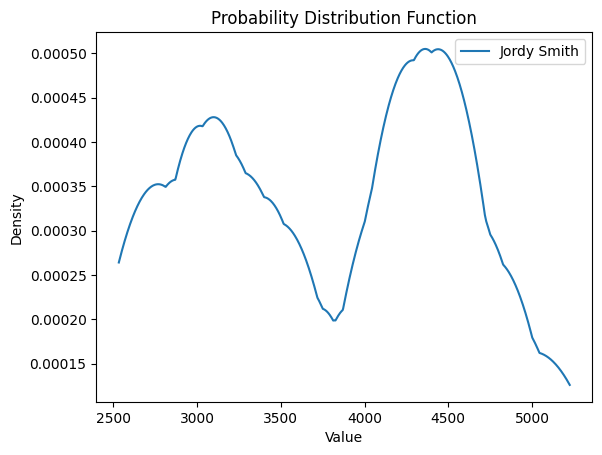

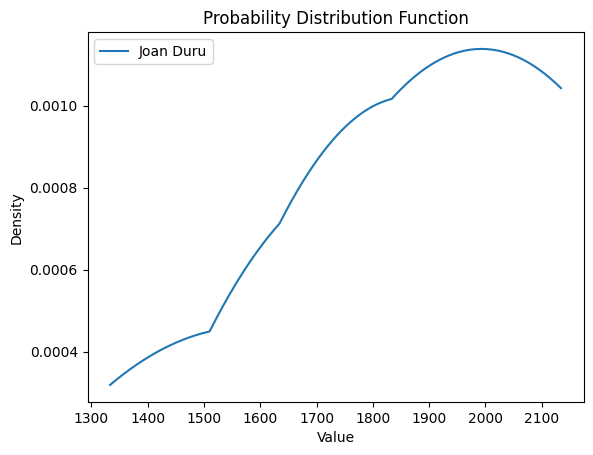

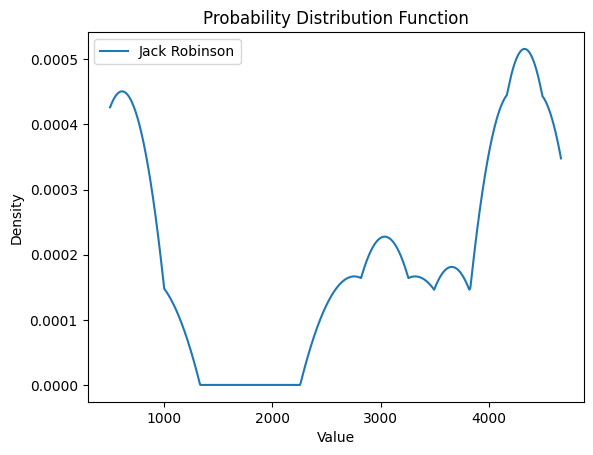

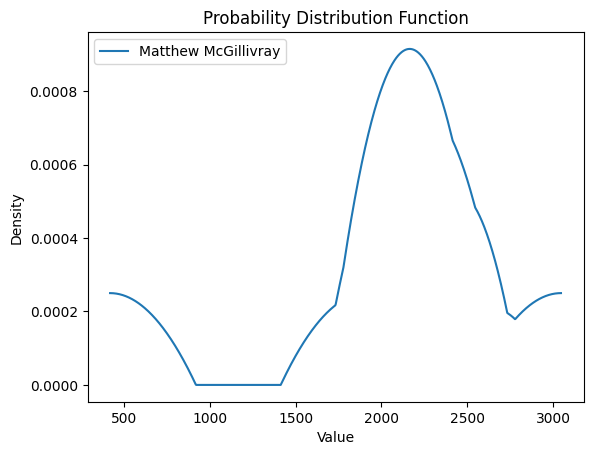

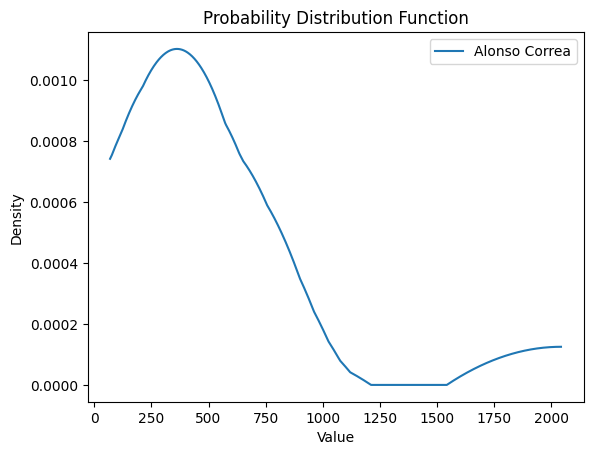

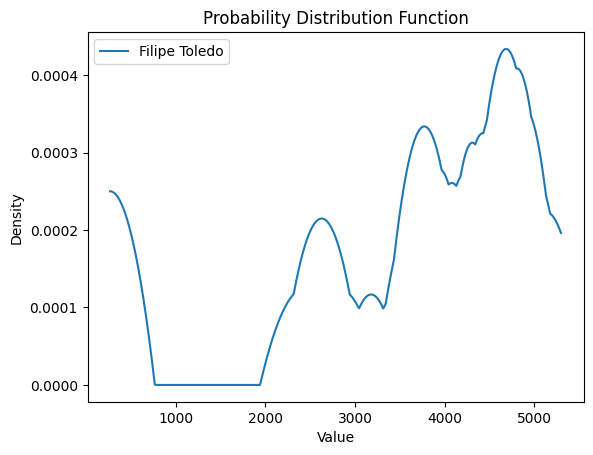

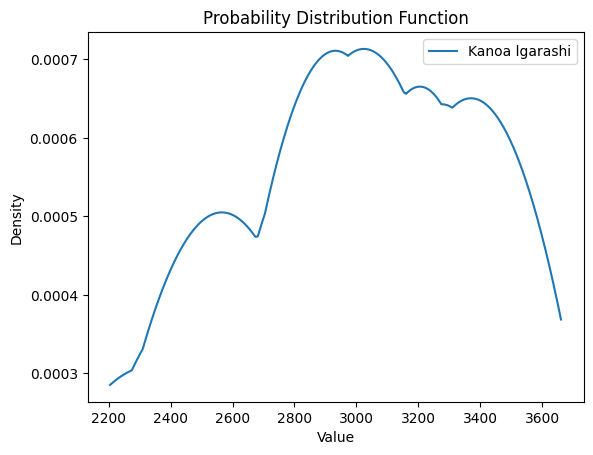

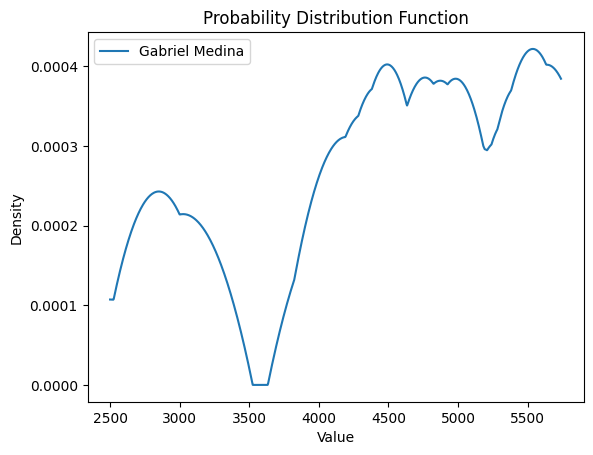

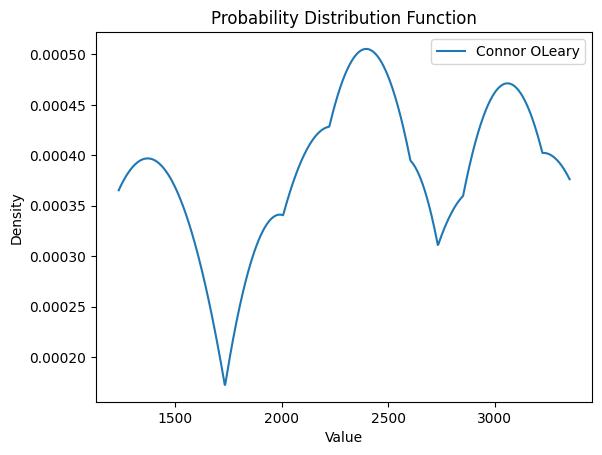

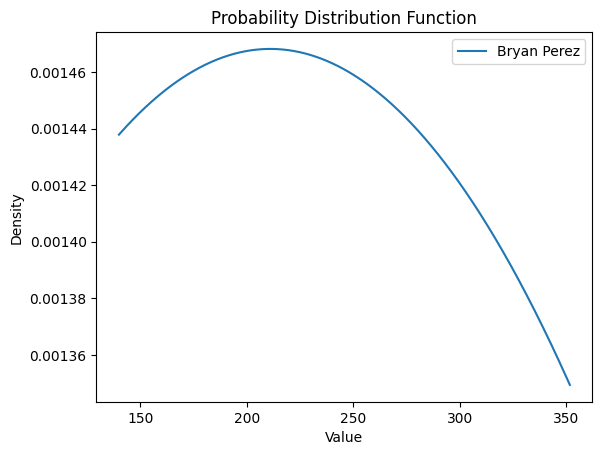

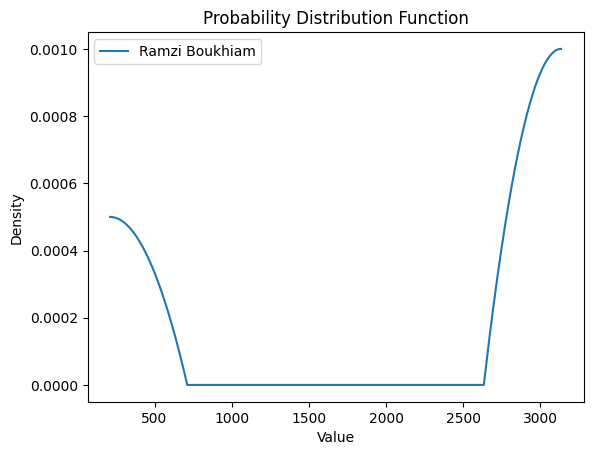

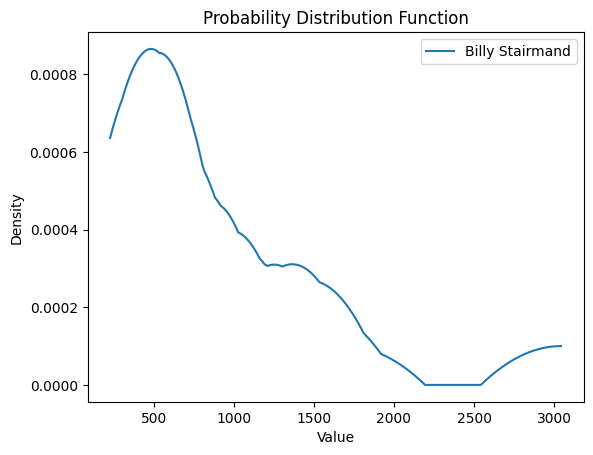

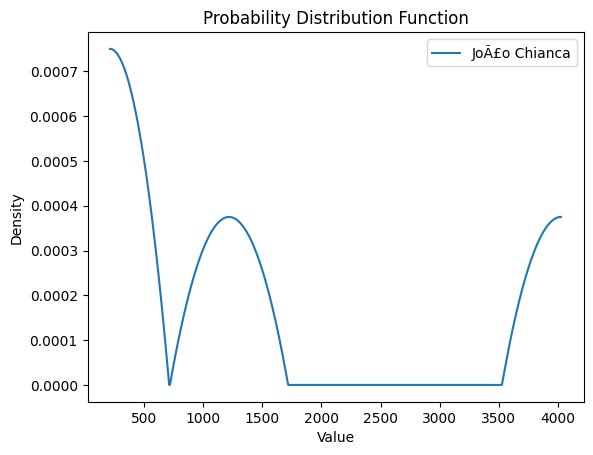

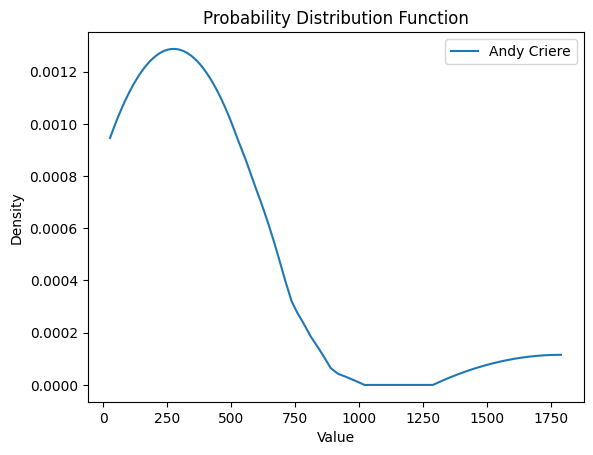

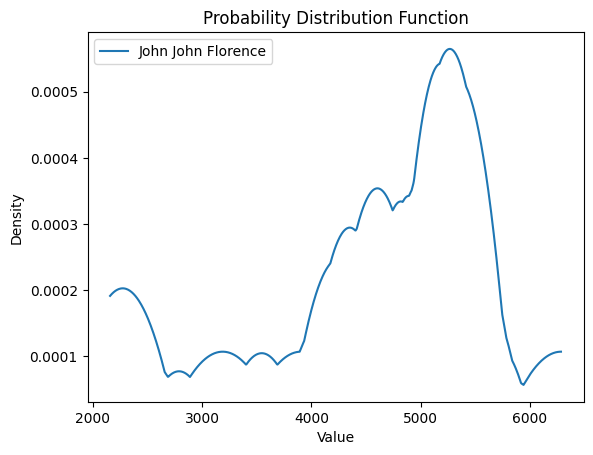

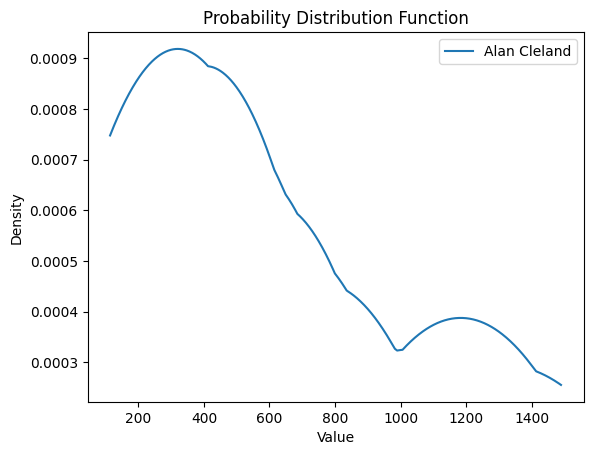

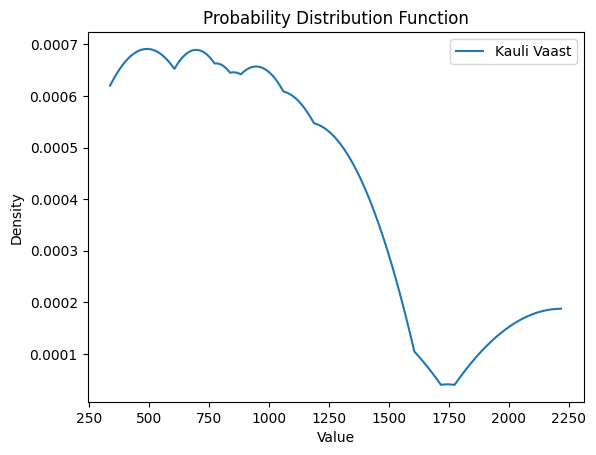

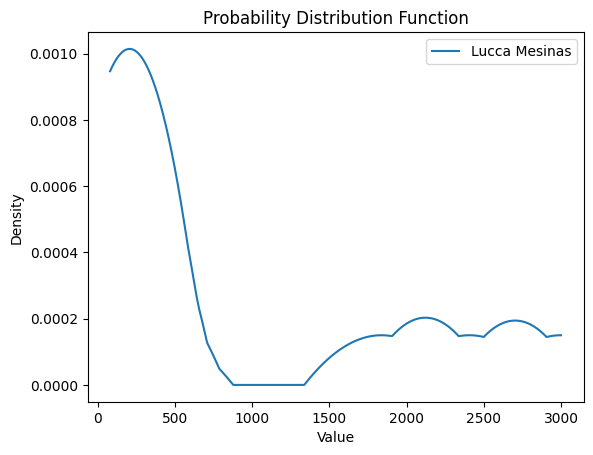

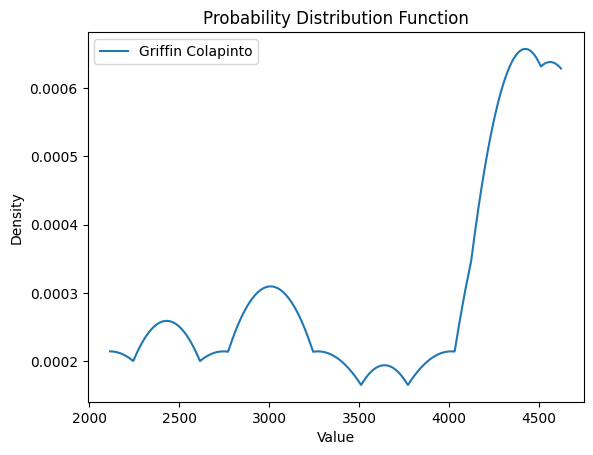

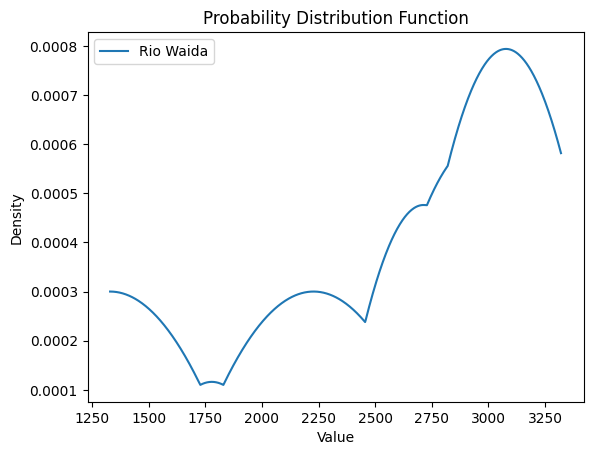

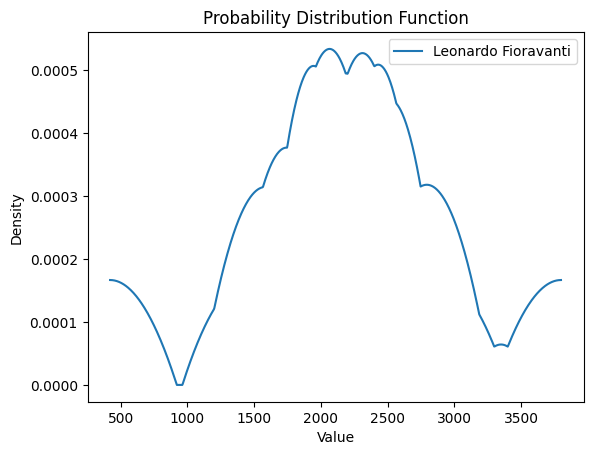

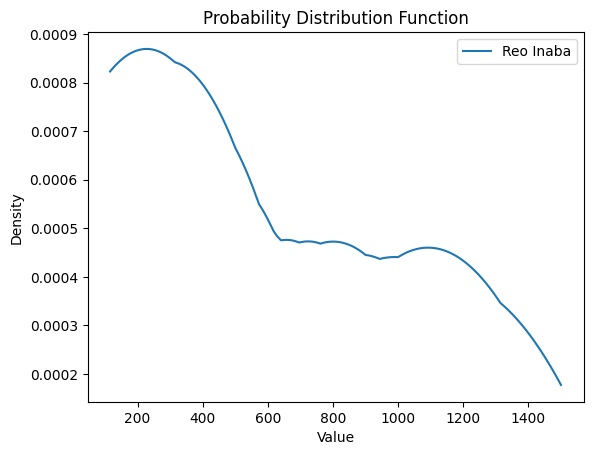

In [67]:
import random
from sklearn.neighbors import KernelDensity

df_unique = df2.drop_duplicates(subset='Name', keep='first')

kdes=[]

# print(df_unique)
for name in df_unique['Name']:
  points = df2.loc[df2['Name'] == name, 'Average Points per Events']
  years = df2.loc[df2['Name'] == name, 'Year']
  dataset = points.values[:, np.newaxis]

  for i in years:
    if i == '2024' or i == '2023/2024':
      a_1 = dataset[0][:, np.newaxis]
      dataset = np.concatenate((a_1,dataset),axis=0)
    break


  kde = KernelDensity(kernel='epanechnikov', bandwidth=500).fit(dataset)
  # x_values = np.linspace(min(dataset), max(dataset), 1000)


  # # x_point = np.array([[x_point]])
  # log_density = kde.score_samples(x_values)
  # density = np.exp(log_density)

  # # print(f"The density at x = {x_point[0][0]} is {density[0]}")
  # plt.plot(x_values, density, label=name)

  # plt.title('Probability Distribution Function')
  # plt.xlabel('Value')
  # plt.ylabel('Density')
  # plt.legend()
  # plt.show()

  kdes.append([name,kde])


In [54]:
def round_1(kdes):

  oficial_results=[]

  for i in range(8):
    name_result=[]
    a=i*3
    simulations = []
    for j in range(3):
      simulated_points = []
      while True:
        simulated_points = kdes[a+j][1].sample(1).flatten()
        if simulated_points[0] > 0:
          break
      simulations.append((kdes[a+j][0],simulated_points[0]))
    simulations.sort(key=lambda x: x[1], reverse=True)
    name_result.append([sim[0] for sim in simulations])


    name_results = pd.DataFrame(name_result, columns=['1st', '2nd', '3rd'])
    top_3_names = name_results.apply(pd.Series.value_counts).fillna(0).reset_index()
    top_3_names.columns = ['Name', '1st', '2nd', '3rd']
    top_3_names = top_3_names.sort_values(by='1st', ascending=False)
    oficial_results.append(top_3_names)

  return oficial_results


def simulate_round(kdes, heats):

  oficial_results=[]

  for i in range(heats):
    name_result=[]
    simulations = []
    for j in range(2):
      simulated_points = []
      while True:
        simulated_points = kdes[i][j][1].sample(1).flatten()
        if simulated_points[0] > 0:
          break
      simulations.append((kdes[i][j][0],simulated_points[0]))

    simulations.sort(key=lambda x: x[1], reverse=True)
    name_result.append([sim[0] for sim in simulations])

    name_results = pd.DataFrame(name_result, columns=['1st', '2nd'])
    top_by_heat = name_results.apply(pd.Series.value_counts).fillna(0).reset_index()
    top_by_heat.columns = ['Name', '1st', '2nd']
    top_by_heat = top_by_heat.sort_values(by='1st', ascending=False)
    oficial_results.append(top_by_heat)

  return oficial_results


def update_round (results, kdes, round):
  new_kdes = []

  for heat in results:
    count=0
    for name in heat.iterrows():
      if round:
        if count==0:
          count= 1
          continue
        nombre = name[1].iloc[0]
        for x in kdes:
          if nombre == x[0]:
            new_kdes.append(x)
            break


      else:
        nombre = name[1].iloc[0]
        for k in kdes:
          if k[0] == nombre:
            new_kdes.append(k)
            break
        break


  if round == 1:
    random.shuffle(new_kdes)
  pairs = [(new_kdes[i], new_kdes[i+1]) for i in range(0, len(new_kdes), 2)]

  return pairs, new_kdes


def update_cruces(oficial_results, round_2_results, kdes_round_2,kdes):
  kdes_round_3 = []

  for heat in round_2_results:
    for i in heat.iterrows():
      nombre = i[1].iloc[0]
      for k in kdes_round_2:
        if k[0] == nombre:
          kdes_round_3.append(k)
          break
      break

  for heat in oficial_results:
    for i in heat.iterrows():
      nombre = i[1].iloc[0]
      for k in kdes:
        if k[0] == nombre:
          kdes_round_3.append(k)
          break
      break

  random.shuffle(kdes_round_3)
  pairs = [(kdes_round_3[i], kdes_round_3[i+1]) for i in range(0, len(kdes_round_3), 2)]
  return pairs, kdes_round_3



def update_ranking(results, round):
  ranking = []

  for heat in results:
    if not round:
      count=0
      for name in heat.iterrows():
        if count==0:
          count= 1
          continue
        nombre = name[1].iloc[0]
        # print(nombre)
        ranking.append(nombre)
    else:
      for name in heat.iterrows():
        nombre = name[1].iloc[0]
        ranking.append(nombre)
      ranking.reverse()

  return ranking


In [73]:
def simulate_tournament(kdes):

  simulations = []

  for _ in range(1000):
    ranking = []


    results = round_1(kdes)

    #round 2
    pairs, new_kdes= update_round(results,kdes,1)
    results_r2 = simulate_round(pairs, 8)

    #8vos de final
    pairs, new_kdes = update_cruces(results,results_r2,new_kdes,kdes)
    results = simulate_round(pairs,8)

    #4tos de final
    pairs, new_kdes = update_round(results,new_kdes,0)
    results = simulate_round(pairs,4)
    ranking+=update_ranking(results,0)


    #semfinal
    pairs, new_kdes = update_round(results,new_kdes,0)
    results = simulate_round(pairs,2)


    #3er puesto
    pairs_3rd, kdes_3rd_place = update_round(results,new_kdes,2)
    third_place_results = simulate_round(pairs_3rd,1)
    ranking+=update_ranking(third_place_results,1)

    #1er y 2do puesto
    pairs, kdes_final = update_round(results,new_kdes,0)
    final_results = simulate_round(pairs,1)
    ranking+=update_ranking(final_results,1)

    ranking.reverse()
    simulations.append(ranking)

  return simulations


In [74]:
from collections import Counter

def get_top_8(simulations, num_simulations=1000):

  counters = [Counter([simulation[i] for simulation in simulations]) for i in range(len(simulations[0]))]
  oficial_ranking = []

  for i in range(8):

    if not i:
      name, count = counters[0].most_common(1)[0]
      oficial_ranking.append([name,count/num_simulations])
      continue

    for j in range(i):
      name, count = oficial_ranking[j]
      if counters[i].get(name):
        counters[i].pop(name)




    name, count = counters[i].most_common(1)[0]

    suma = 0
    for j in range(8-i):
      for x in counters[j+i]:
        if x == name:
          suma += counters[j+i][x]
          break

    prob = count/suma

    oficial_ranking.append([name,prob])

  suma = 0
  prob = [0.5, 0.3, 0.1 , 0.05 , 0.0125 , 0.0125 , 0.0125 , 0.0125]
  for i in range(8):
    tmp = oficial_ranking[i][1] * prob[i]
    suma+=tmp

  return oficial_ranking, suma


In [77]:
simulations = simulate_tournament(kdes)
top_8, precision = get_top_8(simulations)

In [78]:
print(top_8)
print(precision)

[['Gabriel Medina', 0.351], ['John John Florence', 0.29118773946360155], ['Jordy Smith', 0.26993865030674846], ['Griffin Colapinto', 0.29608938547486036], ['Jack Robinson', 0.2972027972027972], ['Kanoa lgarashi', 0.3333333333333333], ['Rio Waida', 0.5064935064935064], ['Filipe Toledo', 1.0]]
0.3313675266063688
